## Четвёртая лабораторная работа

`1) Сгенерировать перестановки значений 1,…n,используя код Грэя.`

In [ ]:
# def gray_code(n):
#     if n == 1: return [['1']]
#     else:
#         result = []
#         perms = gray_code(n - 1)
#         backward = False
#         for perm in perms:
#             if backward:
#                 current = perm.copy()
#                 current.append(str(n))
#                 # current = perm + str(n)
#                 result.append(current.copy())
#                 for i in range(n-1, 0, -1):
#                     swap(i - 1, i, current)
#                     result.append(current.copy())
#             else:
#                 print(n, type(n))
#                 print(perm, type(perm))
#                 print(perms)
#                 current = perm.copy()
#                 current.insert(0, str(n))
#                 # current = str(n) + perm
#                 result.append(current)
#                 for i in range(1, n-1):
#                     print('curr', current, type(current))
#                     swap(i, i + 1, current)
#                     result.append(current.copy())
#             backward = not backward
#         return result
    
# def swap(index_1, index_2, array):
#     array[index_1], array[index_2] = array[index_2], array[index_1]
#     # return

In [75]:
# gray_code(n=3)

In [1]:
def gray_code_permutations(n):
    from math import log2

    def gray_codes(k):
        """Generate n-bit Gray code"""
        if k == 0:
            return ['']
        prev = gray_codes(k - 1)
        return ['0' + code for code in prev] + ['1' + code for code in reversed(prev)]

    def flip_bit_pos(a, b):
        """Return position of single bit difference (LSB)"""
        return int(log2(a ^ b))

    # Generate permutation indices using Gray code order
    factorial = 1
    for i in range(2, n + 1):
        factorial *= i
    base_perm = list(range(1, n + 1))

    # Instead of full binary Gray code, we use reflected Gray code over `factorial` states
    gray_indices = list(range(factorial))
    gray_codes_decimal = [i ^ (i >> 1) for i in gray_indices]

    # Initialize
    from copy import deepcopy
    perms = []
    current = base_perm.copy()
    perms.append(current.copy())

    for i in range(1, factorial):
        prev = gray_codes_decimal[i - 1]
        curr = gray_codes_decimal[i]
        pos = flip_bit_pos(prev, curr)
        # Swap at position based on Gray code bit flip
        if pos < n - 1:
            current[pos], current[pos + 1] = current[pos + 1], current[pos]
        perms.append(current.copy())

    # Convert to string representation like your original
    return [[str(x) for x in p] for p in perms]


In [2]:
from pprint import pprint

pprint(gray_code_permutations(4))


[['1', '2', '3', '4'],
 ['2', '1', '3', '4'],
 ['2', '3', '1', '4'],
 ['3', '2', '1', '4'],
 ['3', '2', '4', '1'],
 ['2', '3', '4', '1'],
 ['2', '4', '3', '1'],
 ['4', '2', '3', '1'],
 ['4', '2', '3', '1'],
 ['2', '4', '3', '1'],
 ['2', '3', '4', '1'],
 ['3', '2', '4', '1'],
 ['3', '2', '1', '4'],
 ['2', '3', '1', '4'],
 ['2', '1', '3', '4'],
 ['1', '2', '3', '4'],
 ['1', '2', '3', '4'],
 ['2', '1', '3', '4'],
 ['2', '3', '1', '4'],
 ['3', '2', '1', '4'],
 ['3', '2', '4', '1'],
 ['2', '3', '4', '1'],
 ['2', '4', '3', '1'],
 ['4', '2', '3', '1']]


### Efficiency comparison analysis

In [3]:
from utils import get_execution_time, plot_time_analysis_results    

----------------------
Method:  narayana_permutations
n:  1
n:  2
n:  3
n:  4
n:  5
n:  6
n:  7
n:  8
n:  9
n:  10
----------------------
Method:  inversion_vectors_permutations
n:  1
n:  2
n:  3
n:  4
n:  5
n:  6
n:  7
n:  8
n:  9
n:  10
----------------------
Method:  johnson_trotter_permutations
n:  1
n:  2
n:  3
n:  4
n:  5
n:  6
n:  7
n:  8
n:  9
n:  10
----------------------
Method:  gray_code_permutations
n:  1
n:  2
n:  3
n:  4
n:  5
n:  6
n:  7
n:  8
n:  9
n:  10


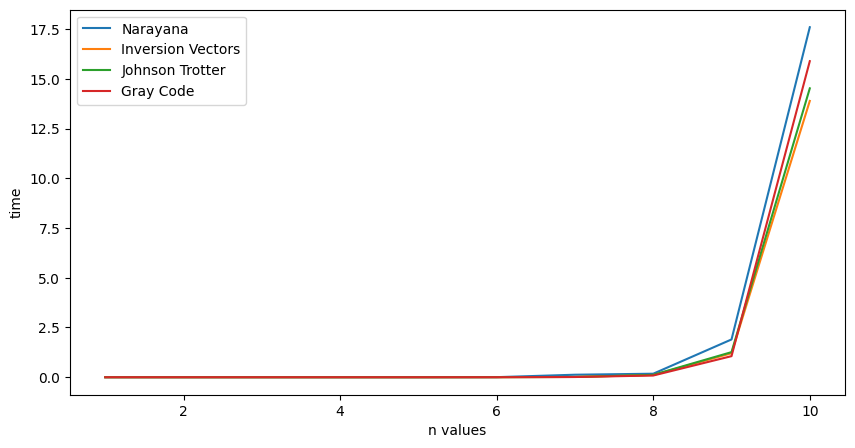

In [5]:
from utils import get_execution_time, plot_time_analysis_results
from lab3 import narayana_permutations, inversion_vectors_permutations, johnson_trotter_permutations

n_values = range(1, 11)

Methods_values = []
for method in [narayana_permutations, inversion_vectors_permutations, johnson_trotter_permutations, gray_code_permutations]:
    Methods_values.append(get_execution_time(n_values, method))

plot_time_analysis_results(n_values, Methods_values, Methods_Names=['Narayana', 'Inversion Vectors', 'Johnson Trotter', 'Gray Code'])
